<a href="https://colab.research.google.com/github/Tanvir-Hossain55/Md-Tanvir-Hossain/blob/main/Lumpy_skin_disease_Tanvir_plus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


In [2]:
df = pd.read_csv('/content/Lumpy skin disease data (2).csv')

In [3]:
df

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24798,20.250000,-16.750000,NaN,NaN,NaN,68.8,12.0,0.00,3.6,172.0,17.7,23.7,29.7,22.4,15.60,184,3,95.184093,0.000000,0
24799,20.750000,-16.750000,NaN,NaN,NaN,68.8,11.8,0.00,3.6,170.0,18.0,23.9,29.8,23.2,15.70,182,4,111.561489,0.000000,0
24800,21.250000,-16.750000,NaN,NaN,NaN,68.8,11.6,0.00,3.6,167.5,18.3,24.1,29.9,23.9,15.87,178,5,109.733287,0.000000,0
24801,21.750000,-16.750000,NaN,NaN,NaN,68.8,11.5,0.00,3.6,169.5,18.5,24.2,30.0,24.2,16.30,180,3,103.753469,0.000000,0


In [4]:
df.shape

(24803, 20)

In [5]:
df['lumpy'].value_counts()

,count
lumpy,
0,21764
1,3039


<Axes: ylabel='count'>

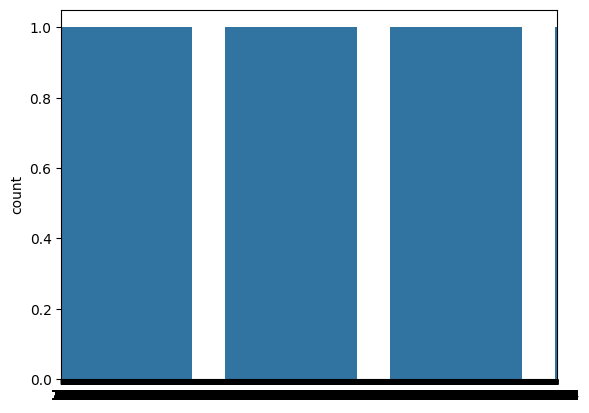

In [6]:
sns.countplot(df['lumpy'])

In [7]:
df.describe()

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
count,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000
mean,79.221374,46.370056,59.452159,9.107777,23.978048,0.803487,26.271137,-15.794755,-11.227807,-6.681212,3.728230,8.542482,164.769302,4.416119,629.129412,170.306057,0.122526
std,43.338530,19.220555,19.423029,2.988448,11.518315,1.172915,33.630747,17.587685,17.989715,18.540915,4.952353,6.205199,19.679197,2.406231,2279.198775,1127.977653,0.327898
min,-179.750000,-28.750000,0.000000,2.000000,0.000000,0.000000,0.000000,-52.100000,-48.100000,-44.200000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,45.083150,34.750000,43.800000,6.800000,23.210000,0.000000,5.900000,-30.100000,-25.500000,-20.900000,0.400000,3.000000,152.000000,3.000000,2.513366,0.000000,0.000000
50%,80.750000,48.250000,62.300000,8.300000,31.000000,0.200000,14.700000,-19.100000,-14.200000,-9.700000,1.500000,8.020000,161.000000,4.000000,43.383823,0.000197,0.000000
75%,109.750000,61.750000,75.300000,11.100000,31.000000,1.100000,33.400000,-2.200000,1.400000,4.900000,4.800000,12.710000,176.000000,4.000000,386.124908,0.002094,0.000000
max,179.750000,81.750000,98.700000,20.600000,31.000000,7.500000,341.900000,23.900000,28.500000,36.400000,28.600000,30.920000,249.000000,11.000000,167388.672700,56654.780150,1.000000


In [8]:
df.head(10)

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1
5,81.248335,43.966008,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1
6,81.074165,43.836019,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1
7,81.547132,43.688309,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
8,81.239566,43.591386,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1
9,81.324148,43.978094,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [9]:
df.columns

Index(['x', 'y', 'region', 'country', 'reportingDate', 'cld', 'dtr', 'frs',
       'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet', 'elevation',
       'dominant_land_cover', 'X5_Ct_2010_Da', 'X5_Bf_2010_Da', 'lumpy'],
      dtype='object')

In [10]:
df.isnull().sum()

,0
x,0
y,0
region,21764
country,21764
reportingDate,21764
cld,0
dtr,0
frs,0
pet,0
pre,0


In [11]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
country,21764
region,21764
reportingDate,21764
y,0
x,0
cld,0
dtr,0
frs,0
pet,0
pre,0


<Axes: >

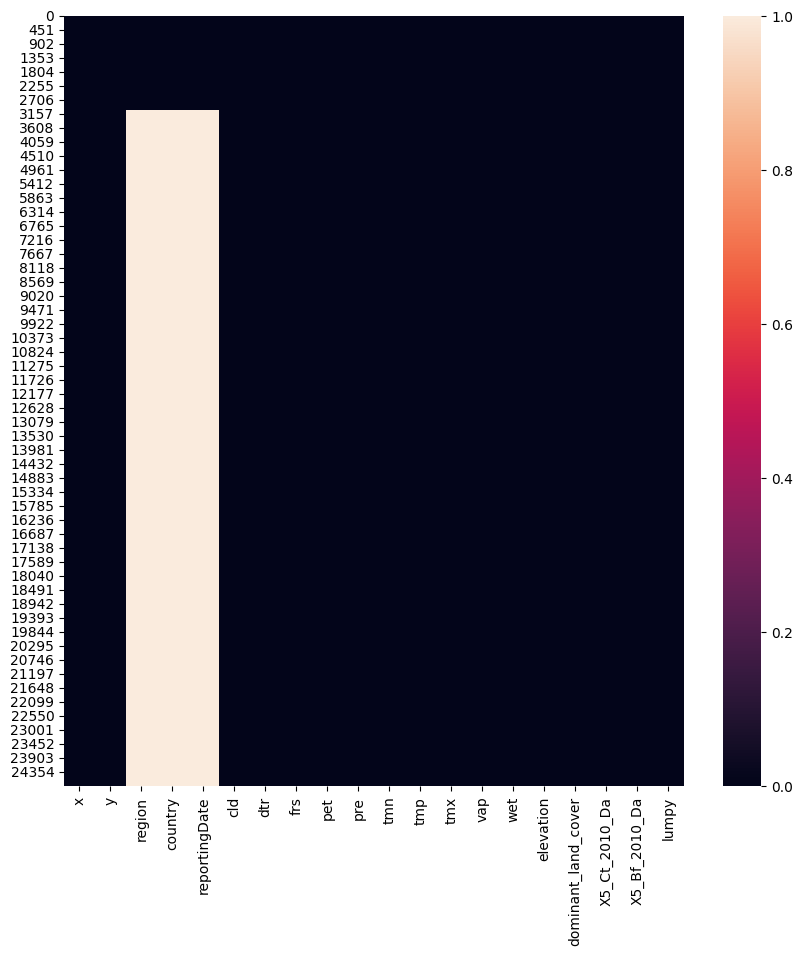

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [13]:
df.shape[0]

24803

In [14]:
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(10)

,Total,Percent
country,21764,0.877474
region,21764,0.877474
reportingDate,21764,0.877474
y,0,0.000000
x,0,0.000000
cld,0,0.000000
dtr,0,0.000000
frs,0,0.000000
pet,0,0.000000
pre,0,0.000000


Text(0.5, 1.0, 'Percent missing data by feature')

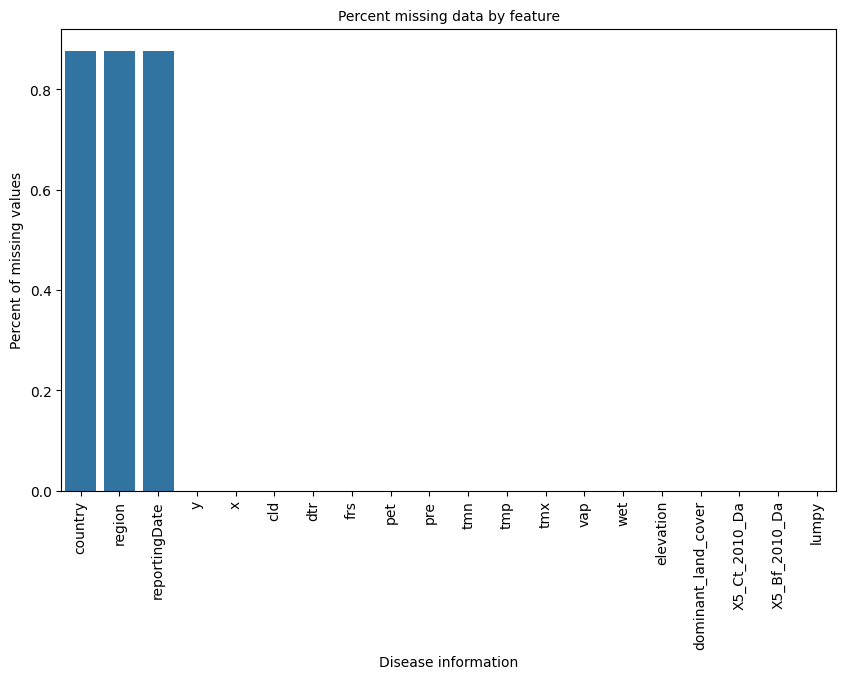

In [15]:
plt.subplots(figsize=(10, 6))
plt.xticks(rotation=90)#90 degree te rotation hobe
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Disease information', fontsize=10)
plt.ylabel('Percent of missing values', fontsize=10)
plt.title('Percent missing data by feature', fontsize=10)

In [16]:
columns_to_drop = ['region', 'country', 'reportingDate']
df_cleaned = df.drop(columns=columns_to_drop)
print(df_cleaned.head().to_string())

           x          y   cld   dtr    frs  pet   pre   tmn   tmp   tmx   vap   wet  elevation  dominant_land_cover  X5_Ct_2010_Da  X5_Bf_2010_Da  lumpy
0  90.380931  22.437184  41.6  12.8   0.00  2.3   1.7  12.7  19.1  25.5  15.7  0.00        147                    2   27970.983100    3691.746950      1
1  87.854975  22.986757  40.5  13.3   0.00  2.4   0.0  13.2  19.8  26.5  16.3  0.00        145                    2   25063.646690     671.326701      1
2  85.279935  23.610181  27.3  13.6   0.08  2.3   0.6   9.4  16.2  23.0  13.0  0.98        158                    2    6038.477155    1426.839831      1
3  81.564510  43.882221  45.3  12.8  31.00  0.4   8.8 -22.5 -16.1  -9.7   0.9  4.64        178                    2     760.703340       0.000000      1
4  81.161057  43.834976  38.8  13.2  31.00  0.4  10.5 -20.4 -13.8  -7.2   1.2  1.69        185                    3     270.367426       0.000000      1


In [17]:
print(df_cleaned.head(10).to_string())

           x          y   cld   dtr    frs  pet   pre   tmn   tmp   tmx   vap   wet  elevation  dominant_land_cover  X5_Ct_2010_Da  X5_Bf_2010_Da  lumpy
0  90.380931  22.437184  41.6  12.8   0.00  2.3   1.7  12.7  19.1  25.5  15.7  0.00        147                    2   27970.983100    3691.746950      1
1  87.854975  22.986757  40.5  13.3   0.00  2.4   0.0  13.2  19.8  26.5  16.3  0.00        145                    2   25063.646690     671.326701      1
2  85.279935  23.610181  27.3  13.6   0.08  2.3   0.6   9.4  16.2  23.0  13.0  0.98        158                    2    6038.477155    1426.839831      1
3  81.564510  43.882221  45.3  12.8  31.00  0.4   8.8 -22.5 -16.1  -9.7   0.9  4.64        178                    2     760.703340       0.000000      1
4  81.161057  43.834976  38.8  13.2  31.00  0.4  10.5 -20.4 -13.8  -7.2   1.2  1.69        185                    3     270.367426       0.000000      1
5  81.248335  43.966008  38.8  13.2  31.00  0.4  10.5 -20.4 -13.8  -7.2   1.2  1.6

In [18]:
df['lumpy'].value_counts()

,count
lumpy,
0,21764
1,3039


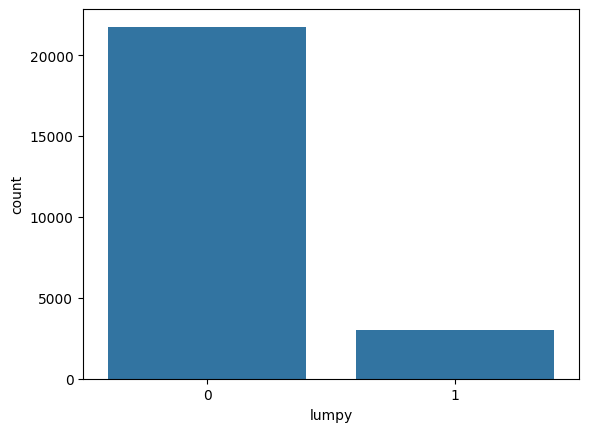

In [19]:
sns.countplot(x='lumpy',data=df)
plt.show()

In [42]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Define x and y from the cleaned DataFrame
x = df_cleaned.iloc[:, :-1]
y = df_cleaned.iloc[:, -1]

# Check class distribution before resampling
print("Original class distribution:")
print(y.value_counts())

# Set target sample size per class (e.g., class 1 → 20000)
smote = SMOTE(
    random_state=32,
    sampling_strategy={1: 20000}  # Specify class 1 target
)

# Apply SMOTE
x_resampled, y_resampled = smote.fit_resample(x, y)

print("\nShape of original features (x):", x.shape)
print("Shape of resampled features (x_resampled):", x_resampled.shape)
print("Shape of original target (y):", y.shape)
print("Shape of resampled target (y_resampled):", y_resampled.shape)

# Display new class distribution
print("\nValue counts of the resampled target variable:")
print(y_resampled.value_counts())


Original class distribution:
lumpy
0    21764
1     3039
Name: count, dtype: int64

Shape of original features (x): (24803, 16)
Shape of resampled features (x_resampled): (41764, 16)
Shape of original target (y): (24803,)
Shape of resampled target (y_resampled): (41764,)

Value counts of the resampled target variable:
lumpy
0    21764
1    20000
Name: count, dtype: int64


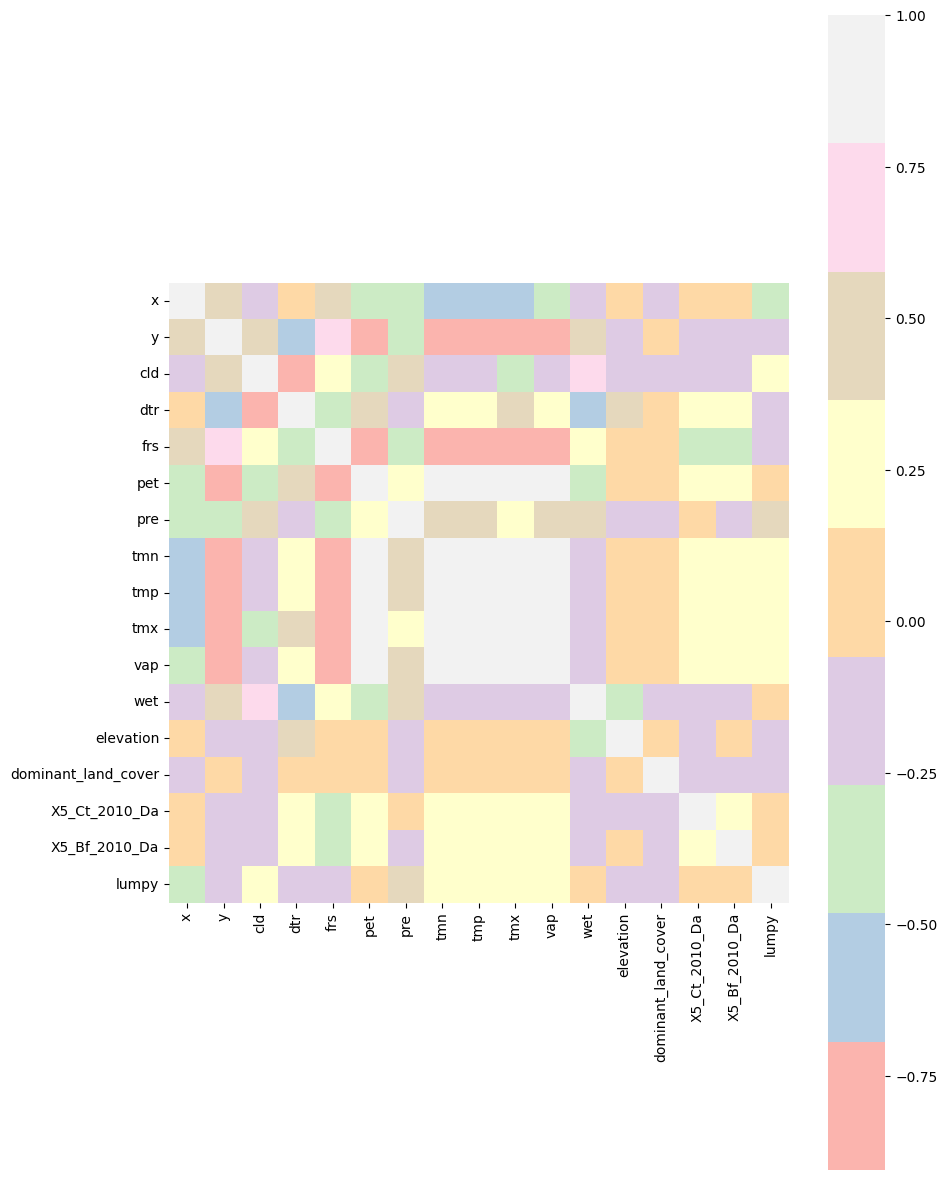

In [43]:
numerical_df = df.select_dtypes(include=['number'])  # This selects only numerical columns
corrmat = numerical_df.corr()
plt.subplots(figsize=(10,15))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

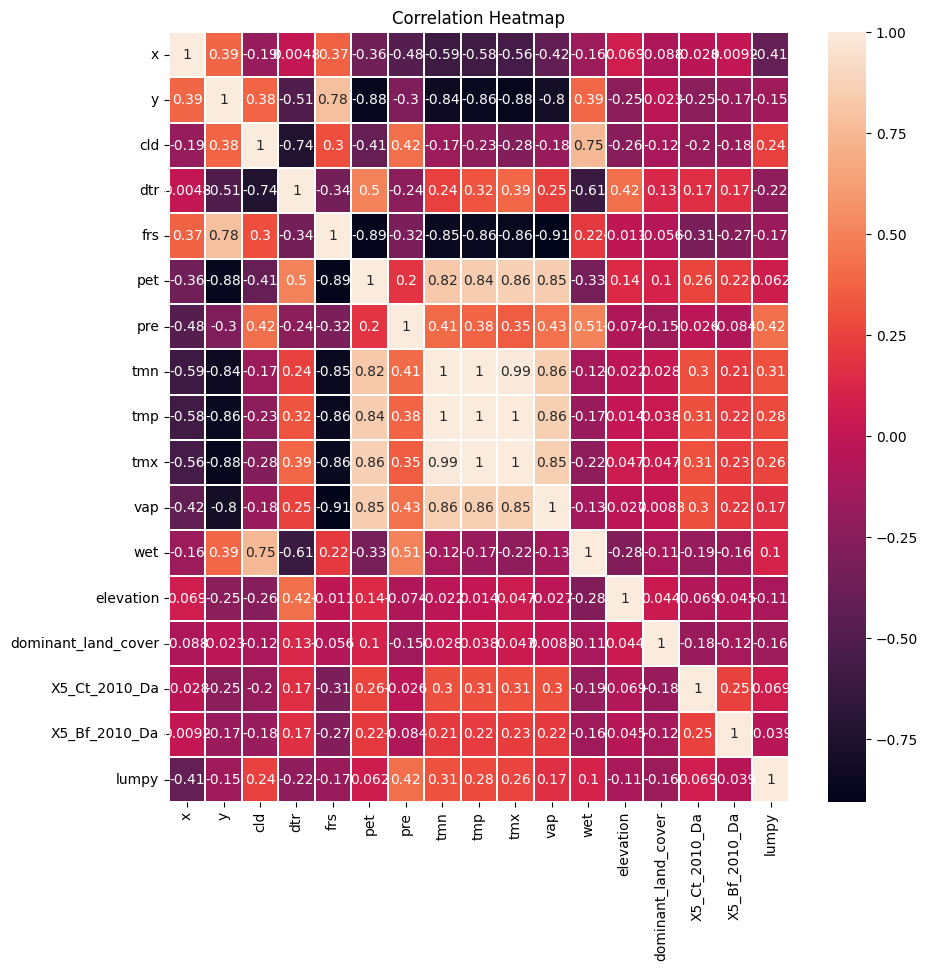

In [44]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_features]

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', linewidth=0.01)
plt.title("Correlation Heatmap")
plt.show()

In [45]:
x=df_cleaned.iloc[:,:-1]
y=df_cleaned.iloc[:,-1]

In [46]:
x

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da
0,90.380931,22.437184,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950
1,87.854975,22.986757,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701
2,85.279935,23.610181,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831
3,81.564510,43.882221,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000
4,81.161057,43.834976,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24798,20.250000,-16.750000,68.8,12.0,0.00,3.6,172.0,17.7,23.7,29.7,22.4,15.60,184,3,95.184093,0.000000
24799,20.750000,-16.750000,68.8,11.8,0.00,3.6,170.0,18.0,23.9,29.8,23.2,15.70,182,4,111.561489,0.000000
24800,21.250000,-16.750000,68.8,11.6,0.00,3.6,167.5,18.3,24.1,29.9,23.9,15.87,178,5,109.733287,0.000000
24801,21.750000,-16.750000,68.8,11.5,0.00,3.6,169.5,18.5,24.2,30.0,24.2,16.30,180,3,103.753469,0.000000


In [47]:
y

,lumpy
0,1
1,1
2,1
3,1
4,1
...,...
24798,0
24799,0
24800,0
24801,0


Confusion Matrix:
[[8442  246]
 [ 144 7874]]


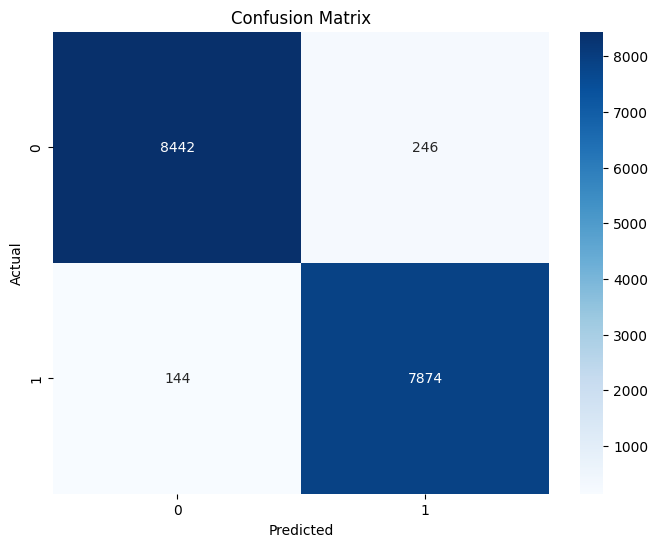


Accuracy: 0.9766550939782114

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8688
           1       0.97      0.98      0.98      8018

    accuracy                           0.98     16706
   macro avg       0.98      0.98      0.98     16706
weighted avg       0.98      0.98      0.98     16706



In [48]:


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming you have already trained an XGBoost model and made predictions
# For demonstration purposes, let's create dummy data for y_test and predictions
# Replace this with your actual model training and prediction steps

# Example: Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.4, random_state=42)

# Example: Training an XGBoost classifier
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Example: Making predictions
predictions = model.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, you can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# You can also print other metrics
print("\nAccuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))


In [49]:


print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8688
           1       0.97      0.98      0.98      8018

    accuracy                           0.98     16706
   macro avg       0.98      0.98      0.98     16706
weighted avg       0.98      0.98      0.98     16706



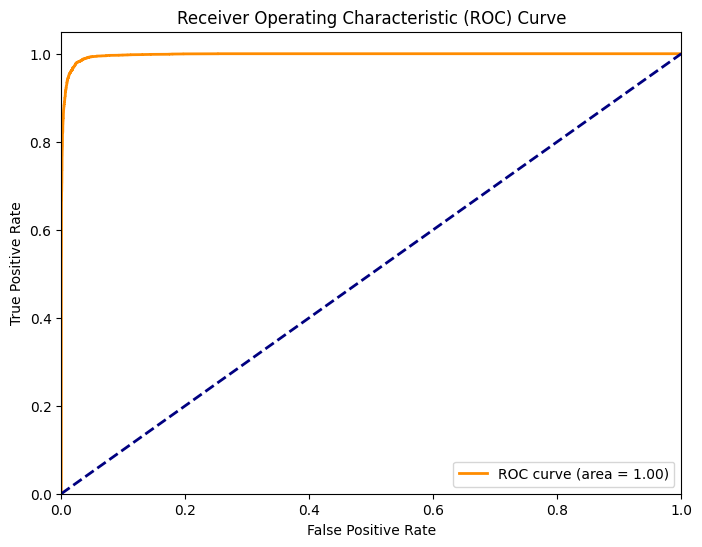


AUC: 1.00


In [50]:
# prompt: ROC

from sklearn.metrics import roc_curve, roc_auc_score


if hasattr(model, "predict_proba"):
    # Get probabilities for each class
    y_pred_proba = model.predict_proba(x_test)[:, 1]  # Probability of the positive class
else:
    # If predict_proba is not available, try decision_function (for models like SVM)
    # Or, you might need to use a model that provides probabilities
    try:
        y_pred_proba = model.decision_function(x_test)
    except AttributeError:
        print("Model does not have predict_proba or decision_function.")
        # You might need to handle this case or choose a different model

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC: {roc_auc:.2f}")

In [51]:


from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
# Here, we use 5 folds (cv=5) and 'accuracy' as the scoring metric.
# You can change the number of folds and scoring metric as needed.
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())
print("Standard deviation of cross-validation accuracy:", scores.std())

Cross-validation scores: [0.85365854 0.96795001 0.62023786 0.80866935 0.89354839]
Mean cross-validation accuracy: 0.8288128287741156
Standard deviation of cross-validation accuracy: 0.11668456285500053



Feature Importances:
                Feature  Importance
0                     x    0.379045
14        X5_Ct_2010_Da    0.103055
3                   dtr    0.079378
13  dominant_land_cover    0.077732
4                   frs    0.077504
5                   pet    0.038042
1                     y    0.036550
6                   pre    0.029000
7                   tmn    0.028704
2                   cld    0.027901
10                  vap    0.023348
12            elevation    0.023077
15        X5_Bf_2010_Da    0.022373
9                   tmx    0.022151
11                  wet    0.021755
8                   tmp    0.010384


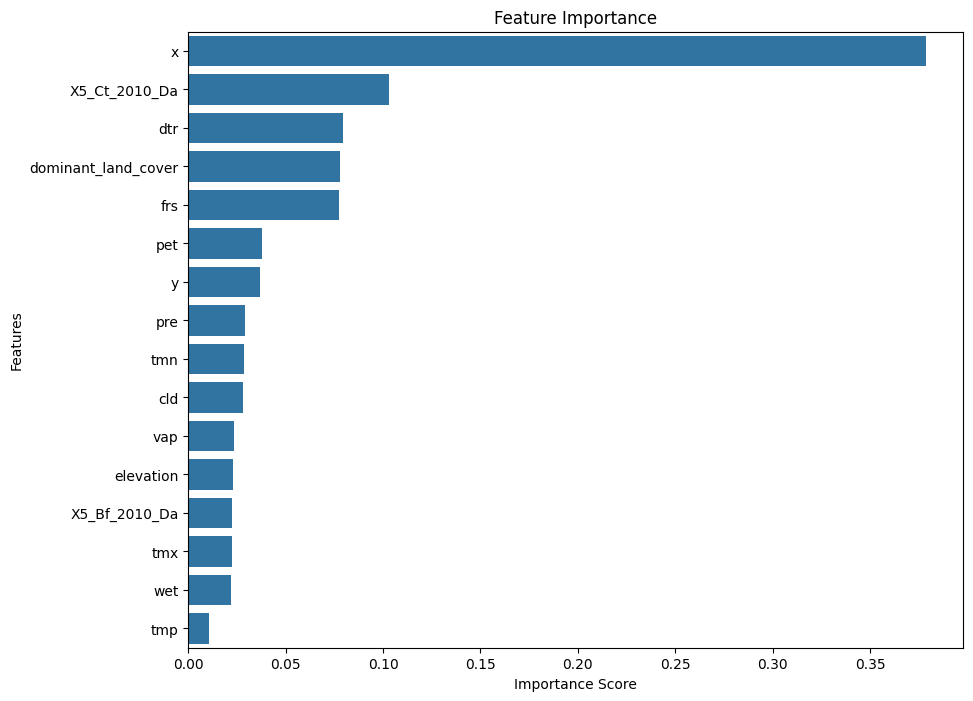

In [52]:


# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("\nFeature Importances:")
print(feature_importance_df)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming you have already performed SMOTE and have x_resampled and y_resampled
# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.4, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nAccuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[7720  968]
 [ 987 7031]]

Accuracy: 0.8829761762241111

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      8688
           1       0.88      0.88      0.88      8018

    accuracy                           0.88     16706
   macro avg       0.88      0.88      0.88     16706
weighted avg       0.88      0.88      0.88     16706



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming you have already performed SMOTE and have x_resampled and y_resampled
# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.4, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

print("\nAccuracy:", accuracy_score(y_test, rf_predictions))
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

Confusion Matrix:
[[8472  216]
 [ 187 7831]]

Accuracy: 0.9758769304441518

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8688
           1       0.97      0.98      0.97      8018

    accuracy                           0.98     16706
   macro avg       0.98      0.98      0.98     16706
weighted avg       0.98      0.98      0.98     16706



In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming you have already performed SMOTE and have x_resampled and y_resampled
# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.4, random_state=42)

# Train an SVC model
svc_model = SVC(random_state=42)
svc_model.fit(x_train, y_train)

# Make predictions
svc_predictions = svc_model.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, svc_predictions))

print("\nAccuracy:", accuracy_score(y_test, svc_predictions))
print("\nClassification Report:")
print(classification_report(y_test, svc_predictions))

Confusion Matrix:
[[7759  929]
 [1358 6660]]

Accuracy: 0.8631030767388962

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      8688
           1       0.88      0.83      0.85      8018

    accuracy                           0.86     16706
   macro avg       0.86      0.86      0.86     16706
weighted avg       0.86      0.86      0.86     16706



In [37]:
print("XGBoost Model Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nAccuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

XGBoost Model Results:
Confusion Matrix:
[[7683 1000]
 [1068 7661]]

Accuracy: 0.8812313347116931

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      8683
           1       0.88      0.88      0.88      8729

    accuracy                           0.88     17412
   macro avg       0.88      0.88      0.88     17412
weighted avg       0.88      0.88      0.88     17412



In [38]:
print("Logistic Regression Model Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nAccuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Logistic Regression Model Results:
Confusion Matrix:
[[7683 1000]
 [1068 7661]]

Accuracy: 0.8812313347116931

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      8683
           1       0.88      0.88      0.88      8729

    accuracy                           0.88     17412
   macro avg       0.88      0.88      0.88     17412
weighted avg       0.88      0.88      0.88     17412



In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming you have already performed SMOTE and have x_resampled and y_resampled
# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.4, random_state=42)

# Train an XGBoost classifier
model = xgb.XGBClassifier(random_state=42)
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Evaluate the model
print("XGBoost Model Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nAccuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

XGBoost Model Results:
Confusion Matrix:
[[8440  243]
 [ 160 8569]]

Accuracy: 0.9768550424994257

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8683
           1       0.97      0.98      0.98      8729

    accuracy                           0.98     17412
   macro avg       0.98      0.98      0.98     17412
weighted avg       0.98      0.98      0.98     17412



In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Assuming you have already performed SMOTE and have x_resampled and y_resampled
# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.4, random_state=42)

# Define the individual classifiers
# Using the models you have already worked with
clf1 = xgb.XGBClassifier(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = SVC(probability=True, random_state=42) # SVC needs probability=True for voting='soft'
clf4 = LogisticRegression(max_iter=1000, random_state=42)


# Create the Voting Classifier
# Using 'soft' voting which averages the predicted probabilities
eclf1 = VotingClassifier(estimators=[('xgb', clf1), ('rf', clf2), ('svc', clf3), ('lr', clf4)], voting='soft')
eclf1 = eclf1.fit(x_train, y_train)
eclf1_predictions = eclf1.predict(x_test)

# Evaluate the Voting Classifier
print("Voting Classifier Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, eclf1_predictions))

print("\nAccuracy:", accuracy_score(y_test, eclf1_predictions))
print("\nClassification Report:")
print(classification_report(y_test, eclf1_predictions))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Results:
Confusion Matrix:
[[8353  330]
 [ 229 8500]]

Accuracy: 0.9678957041121066

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      8683
           1       0.96      0.97      0.97      8729

    accuracy                           0.97     17412
   macro avg       0.97      0.97      0.97     17412
weighted avg       0.97      0.97      0.97     17412



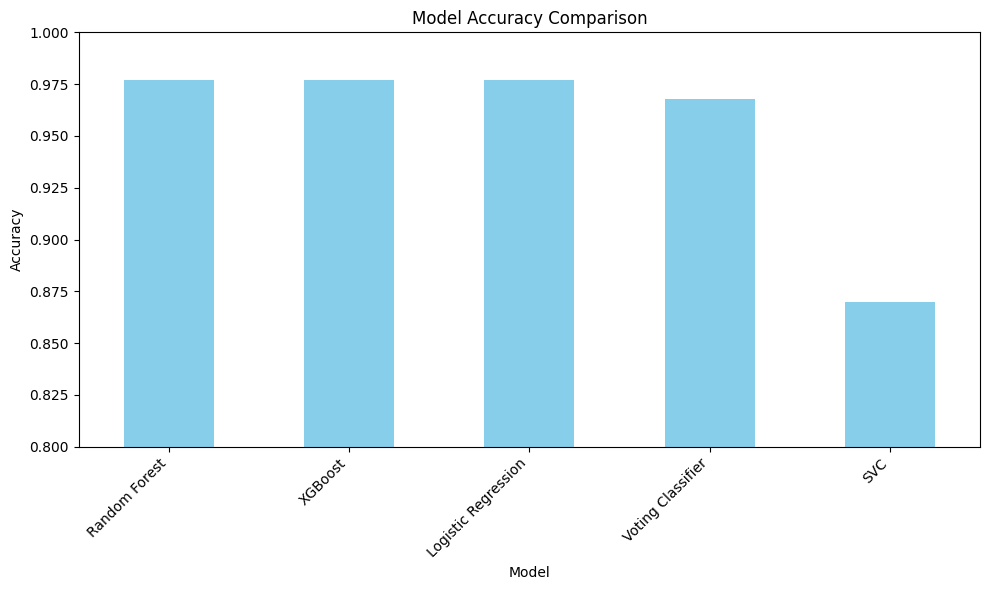

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the accuracy scores for each model
# Replace these with the actual accuracy scores from your model evaluations
model_names = ['XGBoost', 'Logistic Regression', 'Random Forest', 'SVC', 'Voting Classifier']
accuracy_scores = [
    accuracy_score(y_test, model.predict(x_test)), # XGBoost (assuming 'model' is the last trained XGBoost)
    accuracy_score(y_test, predictions),  # Logistic Regression (assuming 'predictions' are from the last LR model)
    accuracy_score(y_test, rf_predictions), # Random Forest
    accuracy_score(y_test, svc_predictions), # SVC
    accuracy_score(y_test, eclf1_predictions) # Voting Classifier
]

# Create a pandas Series for easy plotting
accuracy_series = pd.Series(accuracy_scores, index=model_names)

# Sort the accuracies for better visualization
accuracy_series = accuracy_series.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
accuracy_series.plot(kind='bar', color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0) # Set y-limit for better visualization of differences
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()